<a href="https://colab.research.google.com/github/Bhimsendabby/Machine--Learning-practice/blob/main/Autocoder_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder with MNIST Dataset

This document provides a step-by-step guide to building an autoencoder using the MNIST dataset. The autoencoder is a type of neural network that learns to compress (encode) the data and then reconstruct (decode) it back to the original form.

## Table of Contents

1. [Introduction](#introduction)
2. [Setup & Importing Modules](#setup)
3. [Loading Dataset & Data Preprocessing](#data-preprocessing)
4. [Building the Autoencoder](#building-the-autoencoder)
5. [Training the Autoencoder](#training-the-autoencoder)
6. [Evaluating the Autoencoder](#evaluating-the-autoencoder)
7. [Conclusion](#conclusion)

## Introduction

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). The goal of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction.

## Setup

First, ensure you have the necessary libraries installed. You can install them using pip if you haven't already.

```bash
pip install tensorflow keras numpy matplotlib


Ref:- https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/?ref=lbp

# Setup & Importing Modules

In [1]:
#Importing all the required libraries
import torch
import torch.utils.data
from torch.utils.data import DataLoader,dataset
import torchvision
from torchvision import transforms,datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters

In [2]:
#Batch size for iterating images in batching
batch_size = 32
learning_rate = 1e-1
epochs = 10

# Loading Dataset & Data Preprocessing

In [3]:
# Downloading MNIST Dataset and saving in the root directory
# Using Transform for converting images into torch tensors
train_dataset = datasets.MNIST(root='/content/mnist',train=True,transform=transforms.ToTensor(),download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17441392.99it/s]


Extracting /content/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /content/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 478226.36it/s]


Extracting /content/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /content/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4338685.93it/s]


Extracting /content/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4102181.04it/s]

Extracting /content/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/mnist/MNIST/raw



In [4]:
# Initialing DataLoader for loading dataset in batches
# 100 images, batch size =10 then dataloader with iterate 100 images by 10 by 10
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

In [5]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,36),
        nn.ReLU(),
        nn.Linear(36,18),
        nn.ReLU(),
        nn.Linear(18,9)
    )

    self.decoder = nn.Sequential(
        nn.Linear(9,18),
        nn.ReLU(),
        nn.Linear(18,36),
        nn.ReLU(),
        nn.Linear(36,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28),
        nn.Sigmoid()
    )


  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [6]:
model = Autoencoder()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate,
                             weight_decay = 1e-8)

In [7]:
n_total_steps = len(train_loader)
n_total_steps

1875

Epoch [1/10], Loss: 0.0634
Epoch [2/10], Loss: 0.0678
Epoch [3/10], Loss: 0.0640
Epoch [4/10], Loss: 0.0688
Epoch [5/10], Loss: 0.0677
Epoch [6/10], Loss: 0.0656
Epoch [7/10], Loss: 0.0648
Epoch [8/10], Loss: 0.0702
Epoch [9/10], Loss: 0.0687
Epoch [10/10], Loss: 0.0715


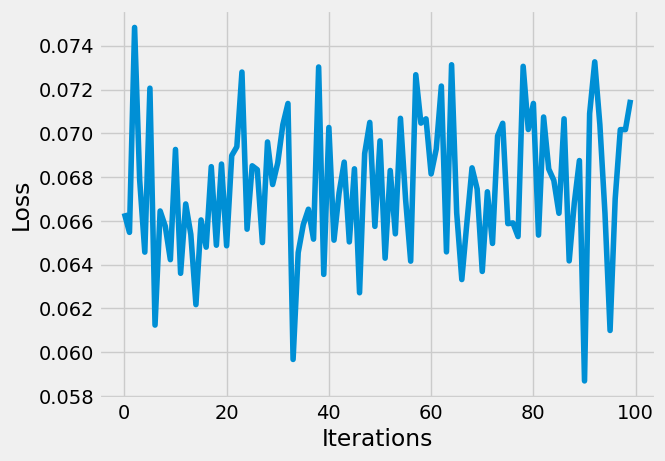

In [8]:
outputs = []
losses = []
for epoch in range(epochs):
  for (image, _) in train_loader:
    image = image.reshape(-1,28*28)
    reconstruct = model(image)

    loss = criterion(reconstruct,image)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

  print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

  outputs.append((epochs, image, reconstruct))



# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

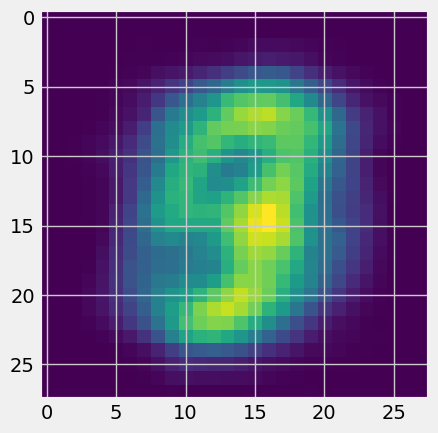

In [11]:
with torch.no_grad():
  for i, item in enumerate(image):
    # Reshape the array for plotting
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

  for i, item in enumerate(reconstruct):
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])